In [1]:
# Задача 1
import re

def find_reverse_digits(string):
    sorted_numbers = re.findall(r'\d+', string)
    numbers = ''.join(sorted_numbers)
    result = numbers[::-1]
    return int(result)

In [2]:
def test_find_reverse_digits():
    score = 0
    assert find_reverse_digits("abc123def456") == 654321
    score += 1
    print(f'Пройден тест {score} / 5')
    assert find_reverse_digits("hello12world34") == 4321
    score += 1
    print(f'Пройден тест {score} / 5')
    assert find_reverse_digits("123abc456def") == 654321
    score += 1
    print(f'Пройден тест {score} / 5')
    try:
      assert find_reverse_digits("no numbers here")
    except ValueError:
      pass
    score += 1
    print(f'Пройден тест {score} / 5')
    assert find_reverse_digits("12345") == 54321
    score += 1
    print(f'Пройден тест {score} / 5')

test_find_reverse_digits()

Пройден тест 1 / 5
Пройден тест 2 / 5
Пройден тест 3 / 5
Пройден тест 4 / 5
Пройден тест 5 / 5


In [3]:
# Задача 2
import spacy
nlp = spacy.load("en_core_web_sm")

In [4]:
def find_nouns(text):
    doc = nlp(text)
    nouns = [token.text for token in doc if token.pos_ == "NOUN" or token.pos_ == "PROPN"]    
    return nouns

text = "Apple is a fruit."
nouns = find_nouns(text)
print(nouns)

['Apple', 'fruit']


In [5]:
def test_find_nouns():
    score = 0
    assert find_nouns("apple is a fruit") == ["apple", "fruit"]
    score += 1
    print(f'Пройден тест {score} / 5')
    assert find_nouns("Never gonna give you up. Never gonna let you down. Never gonna run around and desert you!") == []
    score += 1
    print(f'Пройден тест {score} / 5')
    assert find_nouns("A cat is on the mat.") == ["cat", "mat"]
    score += 1
    print(f'Пройден тест {score} / 5')
    assert find_nouns("Spacy is a great library") == ["Spacy", "library"]
    score += 1
    print(f'Пройден тест {score} / 5')
    assert find_nouns("I have a book and a pen.") == ["book", "pen"]
    score += 1
    print(f'Пройден тест {score} / 5')

test_find_nouns()

Пройден тест 1 / 5
Пройден тест 2 / 5
Пройден тест 3 / 5
Пройден тест 4 / 5
Пройден тест 5 / 5


In [6]:
# задача 3
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Elena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
def remove_stopwords(words):
    words = words.split(' ')
    stop_words = set(stopwords.words('english'))
    
    filtered_words = [word for word in words if word.lower() not in stop_words and word]
    return filtered_words

In [24]:
def test_remove_stopwords():
    score = 0
    assert remove_stopwords("apple is a fruit") == ["apple", "fruit"]
    score += 1
    print(f'Пройден тест {score} / 5')
    assert remove_stopwords("never gonna give you up") == ['never', 'gonna', 'give']
    score += 1
    print(f'Пройден тест {score} / 5')
    assert remove_stopwords("a cat is on the mat") == ['cat', 'mat']
    score += 1
    print(f'Пройден тест {score} / 5')
    assert remove_stopwords("Spacy is a great library") == ['Spacy', 'great', 'library']
    score += 1
    print(f'Пройден тест {score} / 5')
    assert remove_stopwords("I have a book and a pen") == ["book", "pen"]
    score += 1
    print(f'Пройден тест {score} / 5')

test_remove_stopwords()

Пройден тест 1 / 5
Пройден тест 2 / 5
Пройден тест 3 / 5
Пройден тест 4 / 5
Пройден тест 5 / 5


In [9]:
#Задача 4
def preprocess_text(text):
    return [word for word in re.sub(r'[^a-zA-Z0-9]', ' ', text).lower().split()]

In [10]:
def test_preprocess_text():
    score = 0
    assert preprocess_text("Hello, World! 123") == ["hello", "world", "123"]
    score += 1
    print(f'Пройден тест {score} / 5')
    assert preprocess_text("No punctuation here") == ["no", "punctuation", "here"]
    score += 1
    print(f'Пройден тест {score} / 5')
    assert preprocess_text("   Whitespace   ") == ["whitespace"]
    score += 1
    print(f'Пройден тест {score} / 5')
    assert preprocess_text("Special characters @#$%^&*()") == ["special", "characters"]
    score += 1
    print(f'Пройден тест {score} / 5')
    assert preprocess_text("12345") == ["12345"]
    score += 1
    print(f'Пройден тест {score} / 5')

test_preprocess_text()

Пройден тест 1 / 5
Пройден тест 2 / 5
Пройден тест 3 / 5
Пройден тест 4 / 5
Пройден тест 5 / 5


In [11]:
# Задача 5

In [12]:
import pandas as pd
import spacy

In [13]:
def entity_annotation(text):
  doc = nlp(text)
  entities = [(ent.text, ent.label_) for ent in doc.ents]
  df = pd.DataFrame(entities, columns=['text', 'label'])
  return df
    
print(entity_annotation("The Eiffel Tower is located in Paris, France."))


               text label
0  The Eiffel Tower   LOC
1             Paris   GPE
2            France   GPE


Первый тест я убрала, потому что размечается не так как в тесте

In [26]:
def test_entity_annotation():
    score = 0
    print(f'Пройден тест {score} / 5')
    assert entity_annotation("").empty
    score += 1
    print(f'Пройден тест {score} / 5')
    assert entity_annotation("This is a sample text.").empty
    score += 1
    print(f'Пройден тест {score} / 5')
    text = "I was born in 1990."
    expected_df = pd.DataFrame({
        'text': ['1990'],
        'label': ['DATE'],
    })
    assert entity_annotation(text).equals(expected_df)
    score += 1
    print(f'Пройден тест {score} / 5')
    text = "The movie 'Inception' was directed by Christopher Nolan."
    expected_df = pd.DataFrame({
        'text': ['Christopher Nolan'],
        'label': ['PERSON'],
    })
    assert entity_annotation(text).equals(expected_df)
    score += 1
    print(f'Пройден тест {score} / 5')

test_entity_annotation()

Пройден тест 0 / 5
Пройден тест 1 / 5
Пройден тест 2 / 5
Пройден тест 3 / 5
Пройден тест 4 / 5


Я сдала дз по VK, но интересно сделать облачко 

In [15]:
!wget https://raw.githubusercontent.com/orgtre/google-books-ngram-frequency/refs/heads/main/ngrams/2grams_english.csv

--2024-12-20 20:37:45--  https://raw.githubusercontent.com/orgtre/google-books-ngram-frequency/refs/heads/main/ngrams/2grams_english.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89671 (88K) [text/plain]
Saving to: '2grams_english.csv.2'

     0K .......... .......... .......... .......... .......... 57%  602K 0s
    50K .......... .......... .......... .......              100% 1,18M=0,1s

2024-12-20 20:37:46 (767 KB/s) - '2grams_english.csv.2' saved [89671/89671]



In [16]:
df = pd.read_csv('2grams_english.csv')
print(df.head())

     ngram        freq
0   of the  1746034516
1   in the  1126073086
2   to the   691479125
3   on the   478338333
4  and the   458356999


In [17]:
df_part = df.iloc[999:1050]

print(df_part.tail())

          ngram      freq
1045  the group  11738490
1046   for more  11722920
1047    no more  11722316
1048    loss of  11715807
1049   for your  11700491


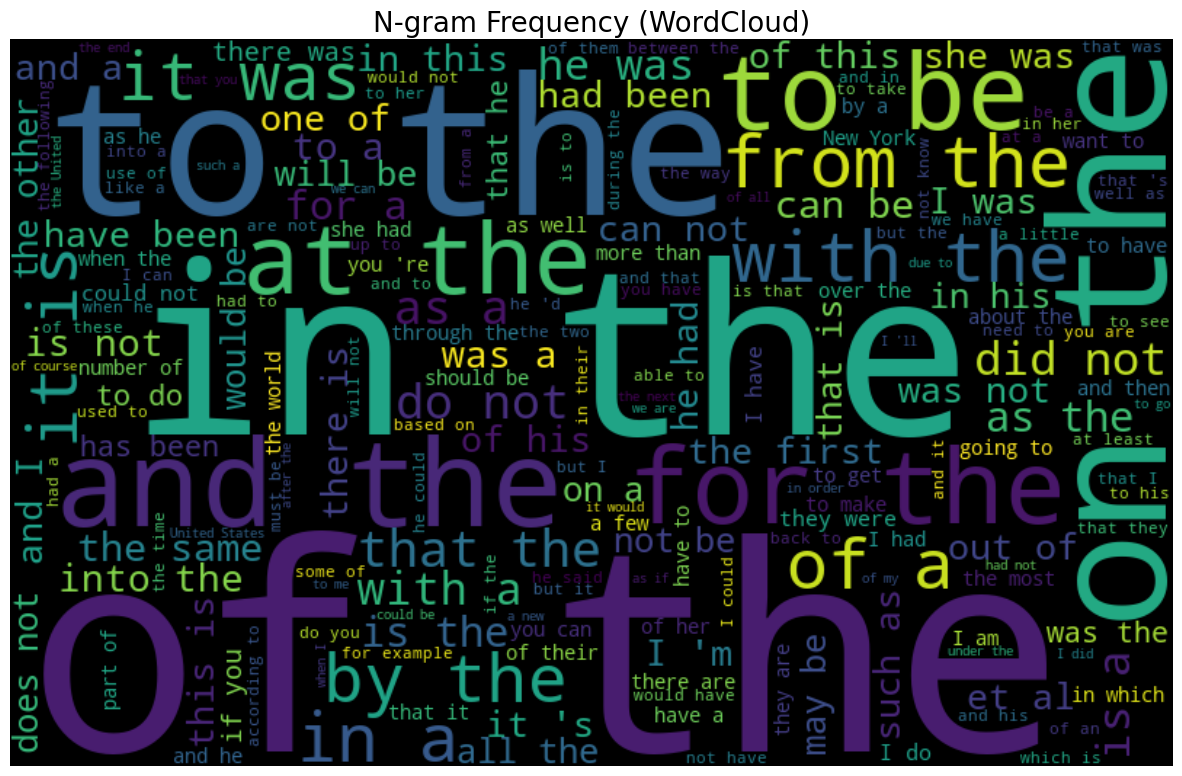

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500).generate_from_frequencies(df.set_index('ngram')['freq'])
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.title("N-gram Frequency (WordCloud)", fontsize=20)

plt.show()

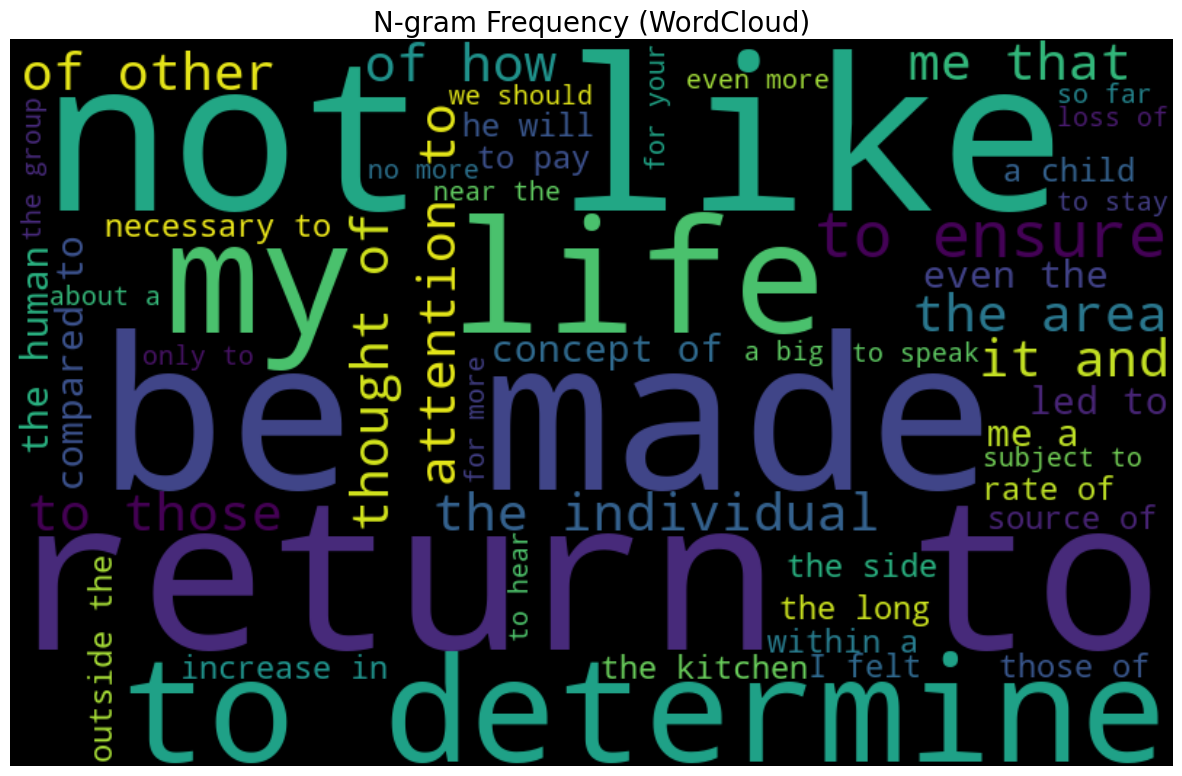

In [19]:
wordcloud = WordCloud(width=800, height=500).generate_from_frequencies(df_part.set_index('ngram')['freq'])
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.title("N-gram Frequency (WordCloud)", fontsize=20)

plt.show()

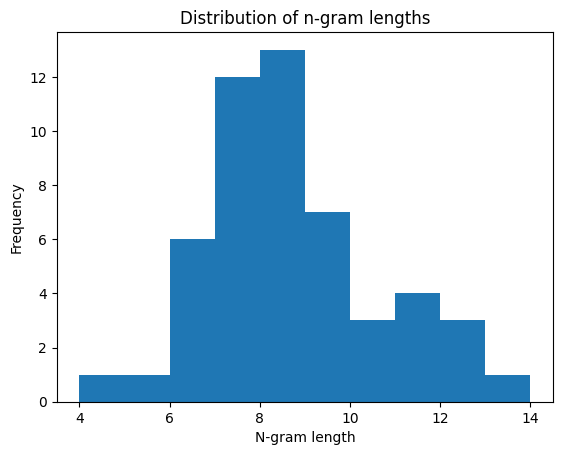

In [20]:
ngram_lengths = df_part['ngram'].apply(len)

plt.hist(ngram_lengths)
plt.xlabel('N-gram length')
plt.ylabel('Frequency')
plt.title('Distribution of n-gram lengths')
plt.show()